In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp, sqrt, pi

In [33]:
df_erp = pd.read_csv("erp.csv")
df_liaison = pd.read_csv("liaison.csv")
df_web = pd.read_csv("web.csv")

## Verification of the key unicity (product_id, id_web)

In [34]:
## Function to test unicity of primary keys

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

def testUnicity(df, column):
    if pd.Series(df[column]).is_unique:
        print("Only Unique Values in the column : "+column+" from "+get_df_name(df))
    else: 
        print("No Unique Values in the column : "+column+" from "+get_df_name(df))
    print("Dataframe shape : "+str(df.shape)+" (Rows, Columns)")

In [35]:
df_web.rename(columns={"sku": "id_web"}, inplace=True)

In [36]:
testUnicity(df_erp, 'product_id')
testUnicity(df_liaison, 'product_id')
testUnicity(df_web, 'id_web')

Only Unique Values in the column : product_id from df_erp
Dataframe shape : (825, 5) (Rows, Columns)
Only Unique Values in the column : product_id from df_liaison
Dataframe shape : (825, 2) (Rows, Columns)
No Unique Values in the column : id_web from df_web
Dataframe shape : (1513, 28) (Rows, Columns)


In [37]:
## Check that all columns in df_web have NaN values

web_null = df_web[df_web['id_web'].isnull()]
web_null.info()
web_null.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
id_web                   0 non-null object
virtual                  85 non-null int64
downloadable             85 non-null int64
rating_count             85 non-null int64
average_rating           2 non-null float64
total_sales              2 non-null float64
tax_status               2 non-null object
tax_class                0 non-null float64
post_author              2 non-null float64
post_date                2 non-null object
post_date_gmt            2 non-null object
post_content             0 non-null float64
post_title               2 non-null object
post_excerpt             2 non-null object
post_status              2 non-null object
comment_status           2 non-null object
ping_status              2 non-null object
post_password            0 non-null float64
post_name                2 non-null object
post_modified            2 non-null object
post_modified_gmt        2 n

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean the new dataframe

In [38]:
NaN_id_web = web_null.dropna(subset=['average_rating'])
NaN_id_web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [39]:
df_web_notnull = df_web[df_web['id_web'].notnull()]
testUnicity(df_web_notnull, 'id_web')

No Unique Values in the column : id_web from df_web_notnull
Dataframe shape : (1428, 28) (Rows, Columns)


In [56]:
## Understand and verify why duplicates exist with randomly selected id_web

check_df = df_web_notnull
check_df.sample()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
60,16504,0,0,0,0.0,5.0,taxable,NaN,2.0,2018-02-13 10:31:33,...,emile-boeckel-sylvaner-vieilles-vignes-2019,2020-08-27 09:28:39,2020-08-27 07:28:39,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [57]:
check_df.loc[check_df['id_web'] == '16504']

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
60,16504,0,0,0,0.0,5.0,taxable,NaN,2.0,2018-02-13 10:31:33,...,emile-boeckel-sylvaner-vieilles-vignes-2019,2020-08-27 09:28:39,2020-08-27 07:28:39,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
858,16504,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-02-13 10:31:33,...,emile-boeckel-sylvaner-vieilles-vignes-2019,2020-08-27 09:28:39,2020-08-27 07:28:39,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [42]:
## We notice that the duplicates come from the "post_type" column 
## and that for each "product" there is an "attachment"
## I decide to delete all the rows with "attachment" in the column "post_type"

df_clean_web = df_web_notnull[df_web_notnull.post_type != 'attachment']
testUnicity(df_clean_web, 'id_web')

Only Unique Values in the column : id_web from df_clean_web
Dataframe shape : (714, 28) (Rows, Columns)


## Join Dataframes

In [43]:
## Now, I have 3 dataframes (df_erp, df_liaison, df_clean_web)
## with unique values on the "product_id" and "id_web", I can proceed to the merge
## The first join will be between: df_erp and df_liaison
## (the 2 dataframes did not have duplicate keys originally)

df_join_erp_liaison = df_erp.merge(df_liaison, on='product_id', how='outer', indicator=True)
df_join_erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [44]:
## We make sure that the join is complete on both sides with only "both" values in the "_merge" column

df_temp = df_join_erp_liaison[df_join_erp_liaison['_merge'] != 'both']
df_temp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge


In [45]:
## We can delete the '_merge' column to join our new dataframe
## (df_join_erp_liaison) to our last dataframe (df_clean_web)

df_join_erp_liaison = df_join_erp_liaison.drop(['_merge'], axis=1)
df_join_erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [46]:
df_complete = df_join_erp_liaison.merge(df_clean_web, on='id_web', how='outer', indicator=True)
df_complete.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [47]:
## We make sure that the join is complete on both sides with only "both" values in the "_merge" column

df_temp = df_complete[df_complete['_merge'] != 'both']
print(df_temp.shape)
df_temp.head()

(111, 34)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [48]:
## We get 111 rows that contain a value other than 'both' in the '_merge' column
## Now we have to check if they are 'right_only' or 'left_only' to understand where these 111 rows come from

df_temp = df_complete[df_complete['_merge'] == 'right_only']
print(df_temp.shape)
df_temp.head()

(0, 34)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge


In [49]:
## We have 111 rows with the value 'left_only' in our complete dataframe
## These are values present in the ERP but not referenced on the Web platform
## It will be necessary to warn Laurent and Sylvie that these 111 products are not referenced 
## For the next step, we will not take into account these 111 because they lack information

df_complete = df_complete[df_complete['_merge']=='both']
df_complete = df_complete.drop(['_merge'], axis=1)
df_complete.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


## Calculation of the turnover of each product

In [50]:
## Using the columns "price" and "total_sales" I can calculate the turnover per product in a new column "CA"

df_complete['CA'] = df_complete['price'] * df_complete['total_sales']
df_complete_CA = df_complete[['product_id', 'price', 'total_sales', 'CA']]
df_complete_CA.head(10)

,product_id,price,total_sales,CA
0,3847,24.2,6.0,145.2
1,3849,34.3,0.0,0.0
2,3850,20.8,0.0,0.0
3,4032,14.1,3.0,42.3
4,4039,46.0,0.0,0.0
5,4040,34.3,0.0,0.0
6,4041,32.7,0.0,0.0
7,4042,31.2,7.0,218.4
8,4043,60.0,3.0,180.0
9,4045,42.6,14.0,596.4


In [51]:
## Now that we have the turnover per product, we can calculate the total turnover

df_complete_CA_total = df_complete_CA['CA'].sum()
print("The total turnover is "+str(df_complete_CA_total)+" €")

The total turnover is 70568.6 €


## Analysis of potential outliers

In [52]:
## Identify and count outliers

Q1 = df_complete['price'].quantile(0.25)
Q3 = df_complete['price'].quantile(0.75)
IQR = Q3 - Q1

print("The IQR is :", IQR)
lower = Q1 - (1.5 * IQR)
print("The lower limit is :", lower)
higher = Q3 + (1.5 * IQR)
print("The higher limit is :", higher)


result = ((df_complete['price'] < lower) | (df_complete['price'] > higher)).sum()
print("Number of outliers : ", result)

The IQR is : 28.075000000000003
The lower limit is : -28.012500000000003
The higher limit is : 84.28750000000001
Number of outliers :  32


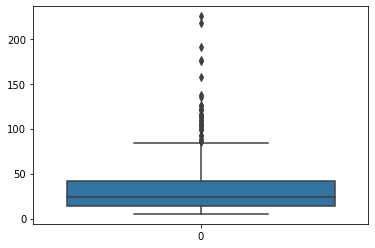

In [53]:
## It captures the summary of the data efficiently and effectively with only a simple "boite à moustache".
## Boxplot summarizes the sample data using the 25th, 50th and 75th percentiles.
## One can simply get information (quartiles, medians and outliers) about the data set
## by simply looking at its "boite à moustache".

sns.boxplot(df_complete['price'])

## It can be seen that the outliers are above 85 (approximatively).
## This does not necessarily mean that the prices are wrong,


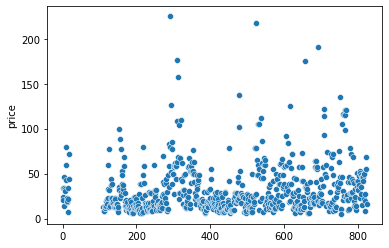

In [54]:
## Scatter diagram of points
## Outliers can be easily displayed

sns.scatterplot(df_complete['price'])

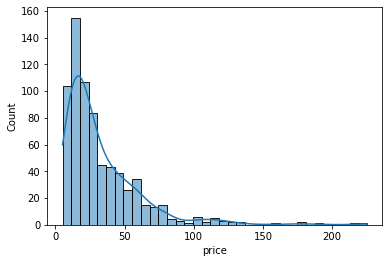

In [55]:
## Histogram, here, is not an efficient way to display outliers

sns.histplot(df_complete['price'], kde=True)